In [5]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df =pd.read_csv("IRIS.CSV")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
df.drop_duplicates(inplace =True)

In [15]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


### feature engineering/preprocessing

In [17]:
# map species to numerical values


df['species']=df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


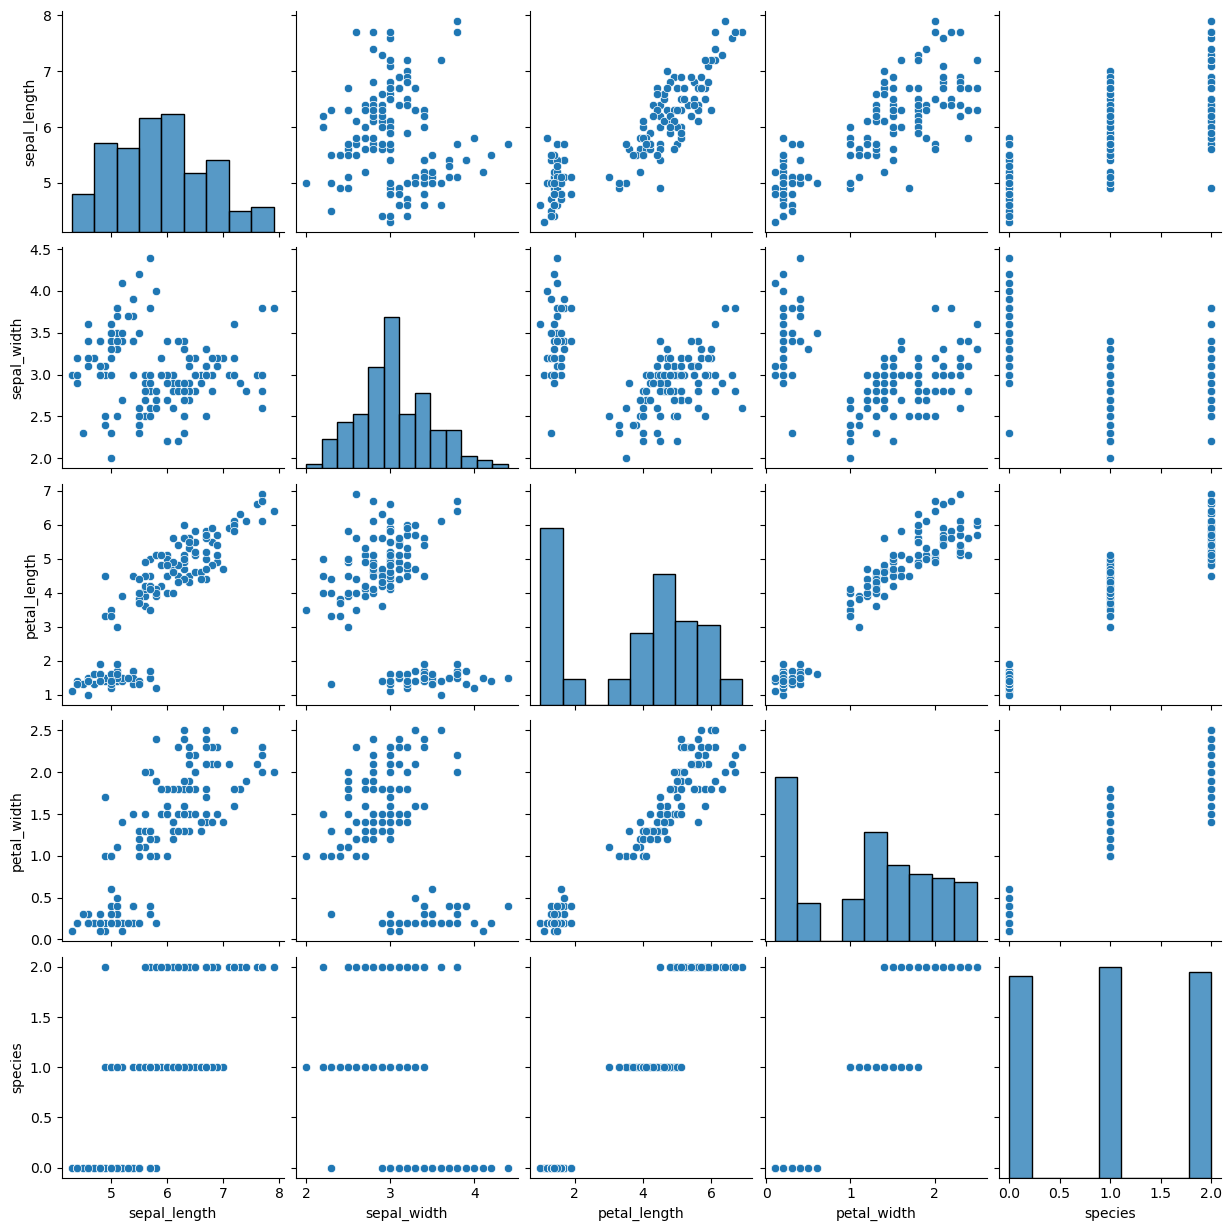

In [19]:
sns.pairplot(df)

In [21]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


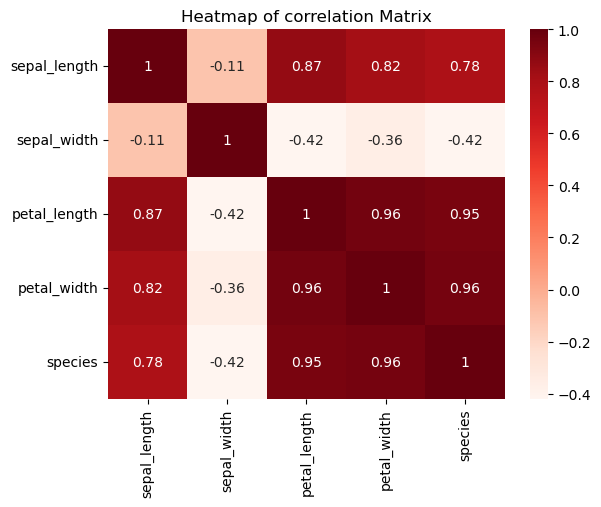

In [23]:
sns.heatmap(corr,annot=True,cmap='Reds')
plt.title('Heatmap of correlation Matrix')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop('species', axis =1)
y=df['species']
# split the dataset into training and testing  sets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=42)


 ### modelling
 Train logistic Regression

In [29]:
# Import the logisticregression class from sklearn
from sklearn.linear_model import LogisticRegression 

# Initialise the logistics Regression models
logistic_model= LogisticRegression()

# Fit the model to training data(x_train and y_train)
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [31]:
# predict the target variable for the test_data(x_test)
y_pred_logistic=logistic_model.predict(x_test)

In [33]:
y_pred_logistic


array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int8)

In [35]:
from sklearn.metrics import accuracy_score
print("Logitics Regression Results:")
print("Accuracy:", accuracy_score(y_test,y_pred_logistic))

Logitics Regression Results:
Accuracy: 0.9333333333333333


In [46]:
y_pred_logistic

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int8)

In [48]:
y_test

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
137    2
47     0
121    2
27     0
4      0
129    2
131    2
148    2
44     0
16     0
10     0
117    2
87     1
141    2
58     1
Name: species, dtype: int8

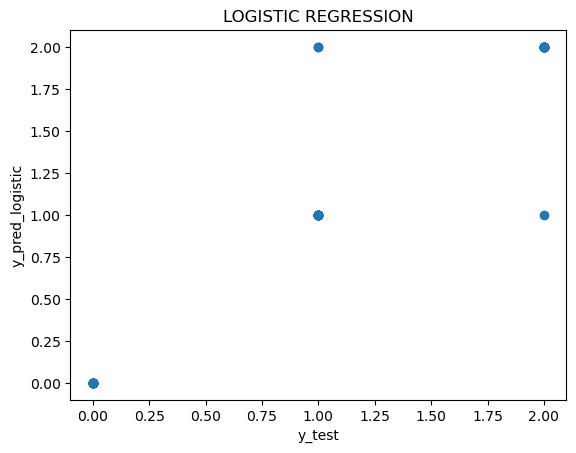

In [80]:
plt.scatter(y_pred_logistic,y_test,)
plt.title('LOGISTIC REGRESSION')
plt.xlabel('y_test')
plt.ylabel('y_pred_logistic')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
x=df.drop('species', axis =1)
y=df['species']
# split the dataset into training and testing  sets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=42)


 ## Validation of RandomForest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
 rm_Pred =rm.predict(x_test)

In [110]:
rm_accuracy = accuracy_score(y_test,rm_Pred)
rm_accuracy

0.9555555555555556

In [112]:
from sklearn.model_selection import train_test_split
x=df.drop('species', axis =1)
y=df['species']
# split the dataset into training and testing  sets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=42)


VALIDATION OF KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
neighbors =KNeighborsClassifier()
neighbors.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
neighbors_Pred =neighbors.predict(x_test)

In [146]:
neighbors_accuracy =accuracy_score(y_test,neighbors_Pred)
neighbors_accuracy

0.9555555555555556

In [170]:
from sklearn.model_selection import train_test_split
x=df.drop('species', axis =1)
y=df['species']
# split the dataset into training and testing  sets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=40)


  ### Validation of svm

In [172]:
from sklearn.svm import SVC
svn =SVC()
svn.fit(x_train,y_train)

SVC()

In [174]:
svn_Pred =svn.predict(x_test)

In [176]:
svn_accuracy=accuracy_score(y_test,svn_Pred)
svn_accuracy


0.9333333333333333